In [2]:
# Importing all modules required

import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [3]:
# Reading the file into a variable
with open('sat1_sspa.txt') as f:
    data = f.readlines()


In [4]:
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
# Values that have to be replaced by 1 while preprocessing. All negative values are replaced by 0
positive_value = ['ON','TRUE','OVER','UNLOCK','SEL','ANT-1']

rows = []
for i in data:
    # if line that is being read contains _, its a column name
    if '_' in i:
        columns.append(i.strip())
    elif len(i.split("\t"))>5:
        #Split the line at tab space (\t) and format the date
        new_list = [j.strip() for j in i.split("\t") if j not in ['',0,'\n']]
        date = new_list[0].split(' ')
        date_string = str(date[1]) + " " +  str(date[0]) + " " +  str(date[2]) + " " +  str(date[3]) + " " +  str(date[4]) + " " +  str(date[5])
        date_object = datetime.strptime(date_string, "%j %Y %H %M %S %f")
        new_list = new_list[1:]
        date_str = date_object.strftime("%Y-%m-%d %H %M %S %f")
        new_list.insert(0, date[-1])
        new_list.insert(0, date_object)
        
        # Replacing positve values with and negative with 0 for better analysing
        for j in range(6,len(new_list),1):
            try: 
                number = float(new_list[j])
            except:
                if new_list[j] in positive_value:
                    new_list[j] = '1'
                else: 
                    new_list[j] = '0'
            
        rows.append(new_list)


        
        

        

In [5]:
#Make date one column instead of different columns for date, year, time etc.
columns = ['Date']+columns[6:]

In [6]:
#Create the dataframe
df = pd.DataFrame()    
for j in range(len(columns)):
    col_data = []
    for i in rows:
        # If no value is found, replace with Not a number, This will later be replaced by the mean of values in the column
        if type(i[j]) == str and i[j].strip() == '':
            i[j] = np.nan
        # First column is date, convert all values into float except for the first column
        if j >= 1:
            col_data.append(float(i[j]))
        else: 
            col_data.append(i[j])
    df[columns[j]] = col_data
    
#Set date as index for dataframe instead of 0,1,2,3,4...
df.set_index('Date', inplace=True)
original_df = df.copy()
deviation_df = df.copy()

for column in df.columns:
    # Filling blank values with mean
    df[column].fillna(value = df[column].mean(), inplace=True)
    # Replacing each value in the deviation df to difference between mean and the value
    deviation_df[column] = df[column] - df[column].mean()

In [7]:
# Display the df (Optional)
display(df)

unknown  BAT_VOL_R_FINE  BAT_VOL_R_COARSE   BUS_VOL  \
Date                                                                           
2018-05-15 00:00:27.094      0.0       40.074196         40.048756  40.05798   
2018-05-15 00:00:27.606      1.0       40.880000         40.870000  40.05798   
2018-05-15 00:00:28.118      2.0       40.880000         40.870000  40.05798   
2018-05-15 00:00:29.142      4.0       40.880000         40.870000  40.05798   
2018-05-15 00:00:30.166      6.0       40.880000         40.870000  40.05798   
...                          ...             ...               ...       ...   
2018-06-16 23:59:56.936     19.0       40.840000         40.800000  40.97500   
2018-06-16 23:59:57.448     20.0       40.840000         40.800000  40.97500   
2018-06-16 23:59:57.960     21.0       40.840000         40.800000  40.97500   
2018-06-16 23:59:58.472     22.0       40.840000         40.800000  40.97500   
2018-06-16 23:59:59.496     24.0       40.840000         40.800000  40.97500   

                         BAT_VOL_M_FINE  BAT_VOL_M_COARSE  BAT_CUR_COARSE  \
Date                                                                        
2018-05-15 00:00:27.094           40.88             40.76            0.00   
2018-05-15 00:00:27.606           40.88             40.76            0.00   
2018-05-15 00:00:28.118           40.88             40.76            0.00   
2018-05-15 00:00:29.142           40.88             40.76            0.00   
2018-05-15 00:00:30.166           40.88             40.76            0.00   
...                                 ...               ...             ...   
2018-06-16 23:59:56.936           40.81             40.76            5.28   
2018-06-16 23:59:57.448           40.81             40.76            5.28   
2018-06-16 23:59:57.960           40.81             40.76            5.28   
2018-06-16 23:59:58.472           40.81             40.76            5.28   
2018-06-16 23:59:59.496           40.81             40.76            5.28   

                         BAT_CUR_FINE  SA_CUR  DER_RATE_PCH  ...  \
Date                                                         ...   
2018-05-15 00:00:27.094          0.00    0.00      -0.03809  ...   
2018-05-15 00:00:27.606          4.61    7.97      -0.03809  ...   
2018-05-15 00:00:28.118          4.61    7.97      -0.03818  ...   
2018-05-15 00:00:29.142          4.61    7.97      -0.03799  ...   
2018-05-15 00:00:30.166          4.61    7.97      -0.03897  ...   
...                               ...     ...           ...  ...   
2018-06-16 23:59:56.936          4.47    7.84      -0.03633  ...   
2018-06-16 23:59:57.448          4.47    7.84      -0.03574  ...   
2018-06-16 23:59:57.960          4.47    7.84      -0.03574  ...   
2018-06-16 23:59:58.472          4.47    7.84      -0.03633  ...   
2018-06-16 23:59:59.496          4.47    7.84      -0.03682  ...   

                         X-TRANSMITTER_(VD01)  X-SSPA_SINK_PLT_(VD0  MEP_EXE  \
Date                                                                           
2018-05-15 00:00:27.094                  0.00                   0.0      0.0   
2018-05-15 00:00:27.606                  0.00                   0.0      0.0   
2018-05-15 00:00:28.118                 17.08                   0.0      0.0   
2018-05-15 00:00:29.142                 17.08                   0.0      0.0   
2018-05-15 00:00:30.166                 17.08                   0.0      0.0   
...                                       ...                   ...      ...   
2018-06-16 23:59:56.936                 15.41                  14.0      0.0   
2018-06-16 23:59:57.448                 15.41                  14.0      0.0   
2018-06-16 23:59:57.960                 15.41                  14.0      0.0   
2018-06-16 23:59:58.472                 15.41                  14.0      0.0   
2018-06-16 23:59:59.496                 15.41                  14.0      0.0   

                         SSPA_ON_STS  DATA_TX_LOCK_STS  

In [8]:
# Display the df (Optional)
display(deviation_df)

unknown  BAT_VOL_R_FINE  BAT_VOL_R_COARSE  BUS_VOL  \
Date                                                                            
2018-05-15 00:00:27.094 -15.152945        0.000000     -7.105427e-15  0.00000   
2018-05-15 00:00:27.606 -14.152945        0.805804      8.212435e-01  0.00000   
2018-05-15 00:00:28.118 -13.152945        0.805804      8.212435e-01  0.00000   
2018-05-15 00:00:29.142 -11.152945        0.805804      8.212435e-01  0.00000   
2018-05-15 00:00:30.166  -9.152945        0.805804      8.212435e-01  0.00000   
...                            ...             ...               ...      ...   
2018-06-16 23:59:56.936   3.847055        0.765804      7.512435e-01  0.91702   
2018-06-16 23:59:57.448   4.847055        0.765804      7.512435e-01  0.91702   
2018-06-16 23:59:57.960   5.847055        0.765804      7.512435e-01  0.91702   
2018-06-16 23:59:58.472   6.847055        0.765804      7.512435e-01  0.91702   
2018-06-16 23:59:59.496   8.847055        0.765804      7.512435e-01  0.91702   

                         BAT_VOL_M_FINE  BAT_VOL_M_COARSE  BAT_CUR_COARSE  \
Date                                                                        
2018-05-15 00:00:27.094        0.823744          0.742739        0.391012   
2018-05-15 00:00:27.606        0.823744          0.742739        0.391012   
2018-05-15 00:00:28.118        0.823744          0.742739        0.391012   
2018-05-15 00:00:29.142        0.823744          0.742739        0.391012   
2018-05-15 00:00:30.166        0.823744          0.742739        0.391012   
...                                 ...               ...             ...   
2018-06-16 23:59:56.936        0.753744          0.742739        5.671012   
2018-06-16 23:59:57.448        0.753744          0.742739        5.671012   
2018-06-16 23:59:57.960        0.753744          0.742739        5.671012   
2018-06-16 23:59:58.472        0.753744          0.742739        5.671012   
2018-06-16 23:59:59.496        0.753744          0.742739        5.671012   

                         BAT_CUR_FINE    SA_CUR  DER_RATE_PCH  ...  \
Date                                                           ...   
2018-05-15 00:00:27.094      0.502363 -2.731514      0.021334  ...   
2018-05-15 00:00:27.606      5.112363  5.238486      0.021334  ...   
2018-05-15 00:00:28.118      5.112363  5.238486      0.021244  ...   
2018-05-15 00:00:29.142      5.112363  5.238486      0.021434  ...   
2018-05-15 00:00:30.166      5.112363  5.238486      0.020454  ...   
...                               ...       ...           ...  ...   
2018-06-16 23:59:56.936      4.972363  5.108486      0.023094  ...   
2018-06-16 23:59:57.448      4.972363  5.108486      0.023684  ...   
2018-06-16 23:59:57.960      4.972363  5.108486      0.023684  ...   
2018-06-16 23:59:58.472      4.972363  5.108486      0.023094  ...   
2018-06-16 23:59:59.496      4.972363  5.108486      0.022604  ...   

                         X-TRANSMITTER_(VD01)  X-SSPA_SINK_PLT_(VD0   MEP_EXE  \
Date                                                                            
2018-05-15 00:00:27.094             -16.99042            -15.477522 -0.127686   
2018-05-15 00:00:27.606             -16.99042            -15.477522 -0.127686   
2018-05-15 00:00:28.118               0.08958            -15.477522 -0.127686   
2018-05-15 00:00:29.142               0.08958            -15.477522 -0.127686   
2018-05-15 00:00:30.166               0.08958            -15.477522 -0.127686   
...                                       ...                   ...       ...   
2018-06-16 23:59:56.936              -1.58042             -1.477522 -0.127686   
2018-06-16 23:59:57.448              -1.58042             -1.477522 -0.127686   
2018-06-16 23:59:57.960              -1.58042             -1.477522 -0.127686   
2018-06-16 23:59:58.472              -1.58042             -1.477522 -0.127686   
2018-06-16 23:59:59.496              -1.58042             -1.477522 -0.127686   

      

In [9]:
df.loc[df['PLD_TX-1_SEL_STS'] == 1]

unknown  BAT_VOL_R_FINE  BAT_VOL_R_COARSE  BUS_VOL  \
Date                                                                          
2018-05-17 20:58:58.805     21.0           41.14             41.09  41.3725   
2018-05-17 20:59:00.341     24.0           41.14             41.09  41.3725   
2018-05-17 20:59:00.853     25.0           41.14             41.09  41.3725   
2018-05-17 20:59:01.365     26.0           41.14             41.09  41.3725   
2018-05-17 20:59:02.389     28.0           41.14             41.09  41.3725   
...                          ...             ...               ...      ...   
2018-06-04 16:42:42.940     16.0           38.29             38.30  38.1925   
2018-06-04 16:42:43.452     17.0           38.29             38.30  38.1925   
2018-06-04 16:42:43.964     18.0           38.29             38.30  38.1925   
2018-06-04 16:42:44.476     19.0           38.29             38.30  38.1925   
2018-06-04 16:42:44.988     20.0           38.29             38.30  38.1925   

                         BAT_VOL_M_FINE  BAT_VOL_M_COARSE  BAT_CUR_COARSE  \
Date                                                                        
2018-05-17 20:58:58.805           41.10             41.05            4.63   
2018-05-17 20:59:00.341           41.14             41.05            4.63   
2018-05-17 20:59:00.853           41.14             41.05            4.63   
2018-05-17 20:59:01.365           41.14             41.05            4.63   
2018-05-17 20:59:02.389           41.14             41.05            4.63   
...                                 ...               ...             ...   
2018-06-04 16:42:42.940           38.21             38.26           -4.89   
2018-06-04 16:42:43.452           38.21             38.26           -4.89   
2018-06-04 16:42:43.964           38.21             38.26           -4.89   
2018-06-04 16:42:44.476           38.21             38.26           -4.89   
2018-06-04 16:42:44.988           38.21             38.26           -4.89   

                         BAT_CUR_FINE  SA_CUR  DER_RATE_PCH  ...  \
Date                                                         ...   
2018-05-17 20:58:58.805          3.98    7.16      -0.07647  ...   
2018-05-17 20:59:00.341          3.98    7.16      -0.07666  ...   
2018-05-17 20:59:00.853          3.84    7.10      -0.07666  ...   
2018-05-17 20:59:01.365          3.84    7.10      -0.07471  ...   
2018-05-17 20:59:02.389          3.84    7.10      -0.07705  ...   
...                               ...     ...           ...  ...   
2018-06-04 16:42:42.940         -4.49   -0.07      -0.01953  ...   
2018-06-04 16:42:43.452         -4.49   -0.07      -0.01953  ...   
2018-06-04 16:42:43.964         -4.49   -0.07      -0.01943  ...   
2018-06-04 16:42:44.476         -4.49   -0.07      -0.01943  ...   
2018-06-04 16:42:44.988         -4.49   -0.07      -0.01904  ...   

                         X-TRANSMITTER_(VD01)  X-SSPA_SINK_PLT_(VD0  MEP_EXE  \
Date                                                                           
2018-05-17 20:58:58.805                 17.08                  15.0      0.0   
2018-05-17 20:59:00.341                 17.08                  15.0      0.0   
2018-05-17 20:59:00.853                 17.08                  15.0      0.0   
2018-05-17 20:59:01.365                 17.08                  15.0      0.0   
2018-05-17 20:59:02.389                 17.08                  15.0      0.0   
...                                       ...                   ...      ...   
2018-06-04 16:42:42.940                 17.08                  16.0      1.0   
2018-06-04 16:42:43.452                 17.08                  16.0      1.0   
2018-06-04 16:42:43.964                 17.08                  16.0      1.0   
2018-06-04 16:42:44.476                 17.08                  16.0      1.0   
2018-06-04 16:42:44.988                 17.08                  16.0      1.0   

                         SSPA_ON_STS  DATA_TX_LOCK_STS  XBS_ANT_SEL_S

/home/aravind/.local/lib/python3.8/site-packages/adtk/visualization/_visualization.py:247: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(


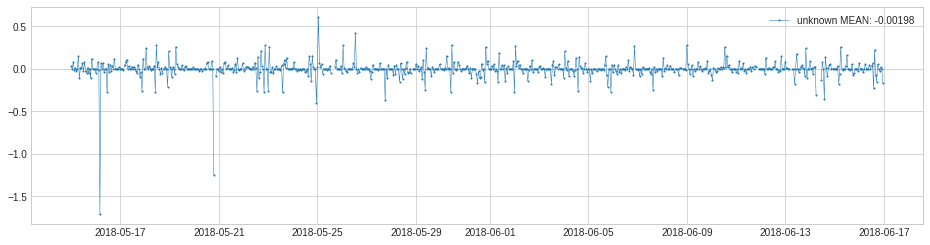

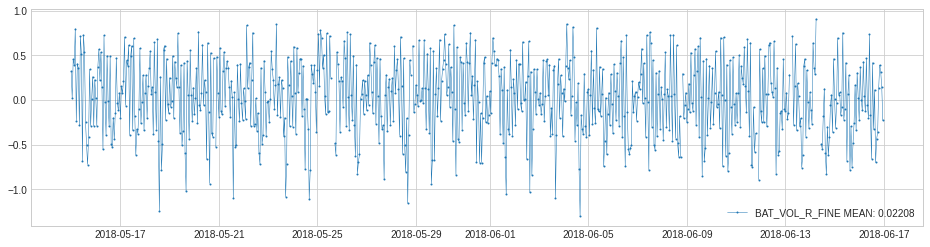

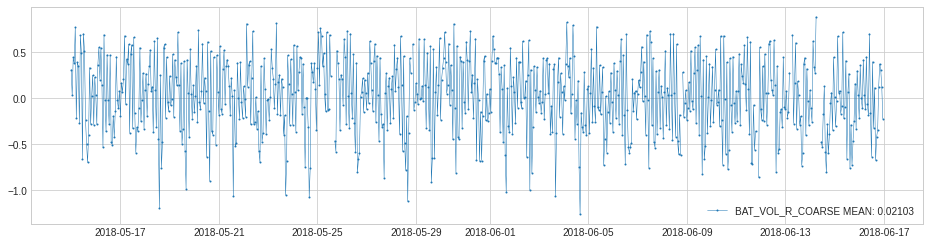

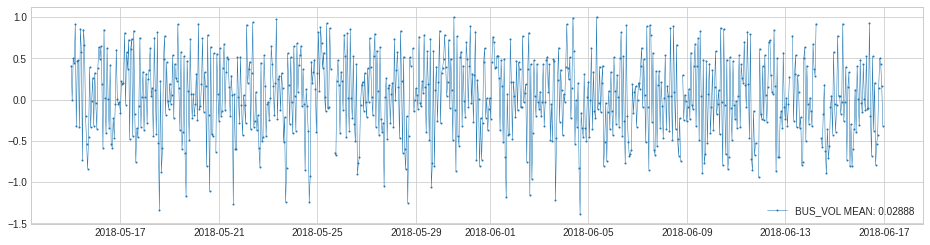

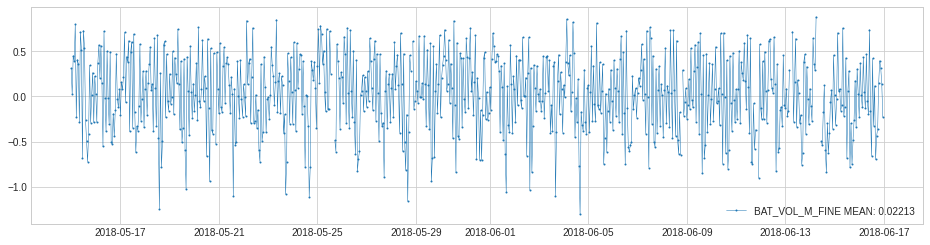

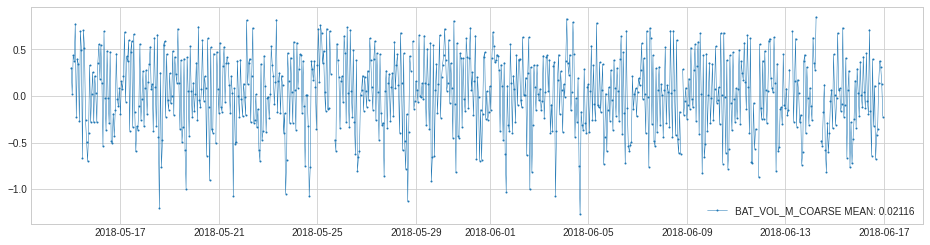

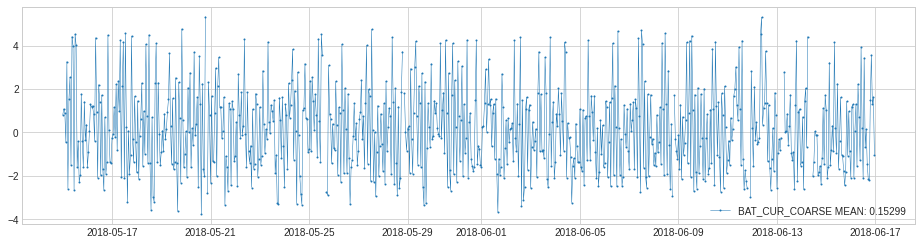

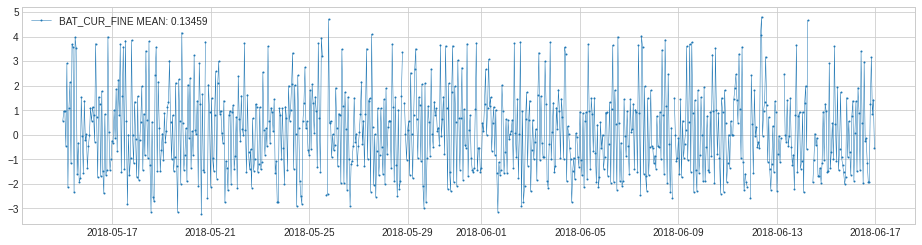

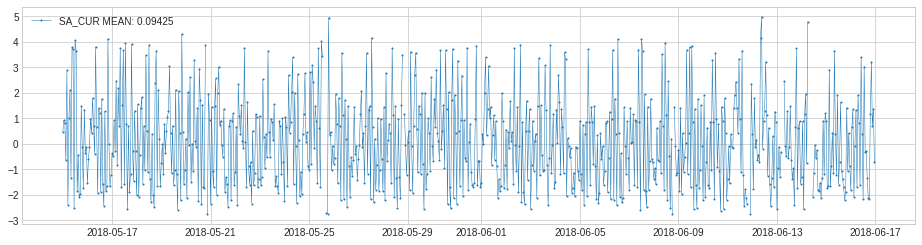

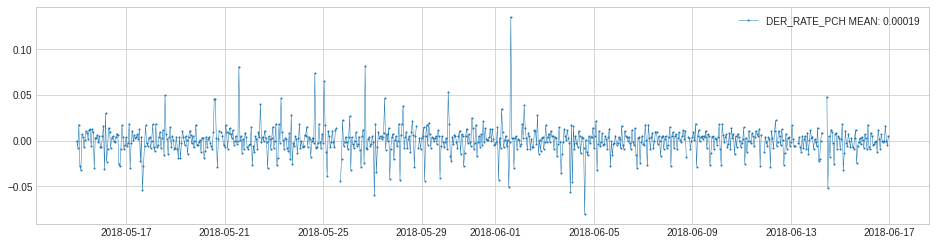

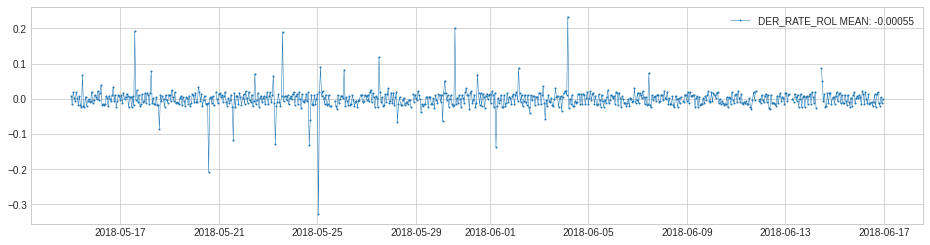

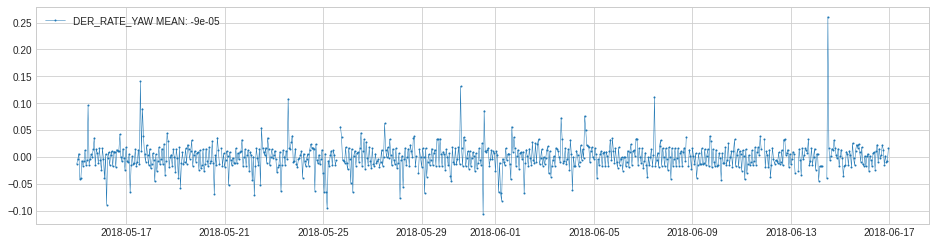

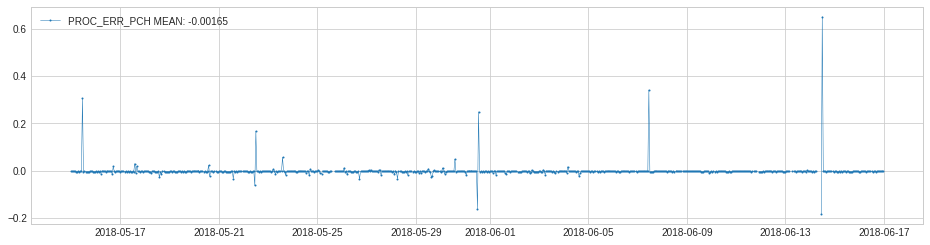

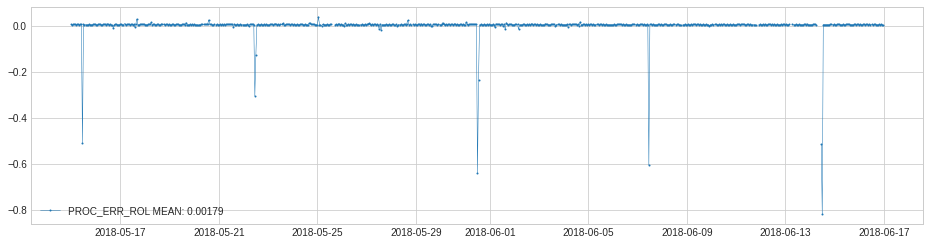

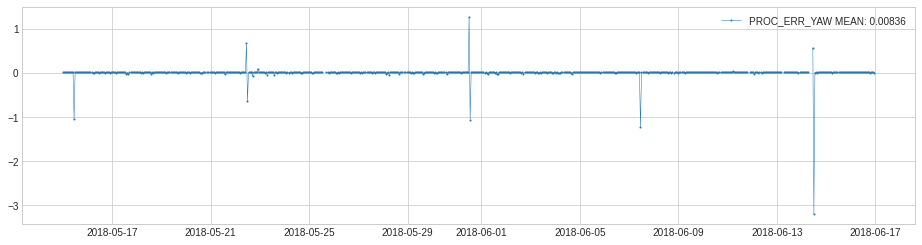

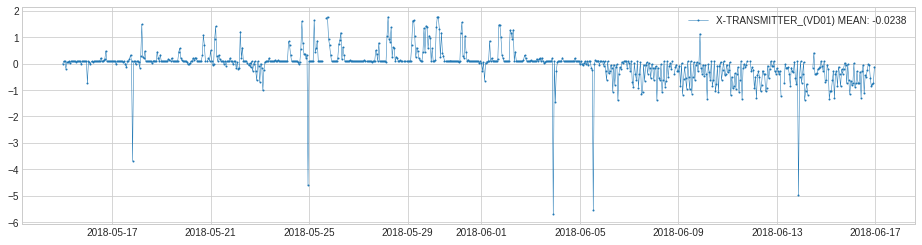

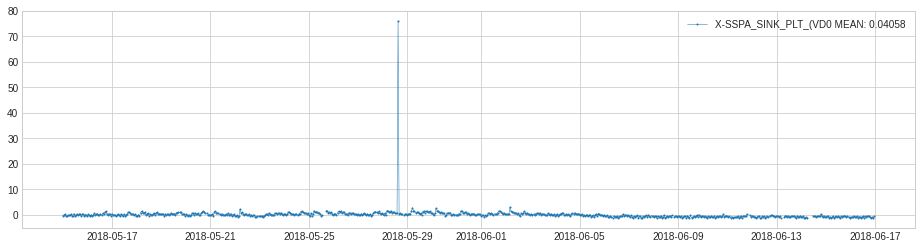

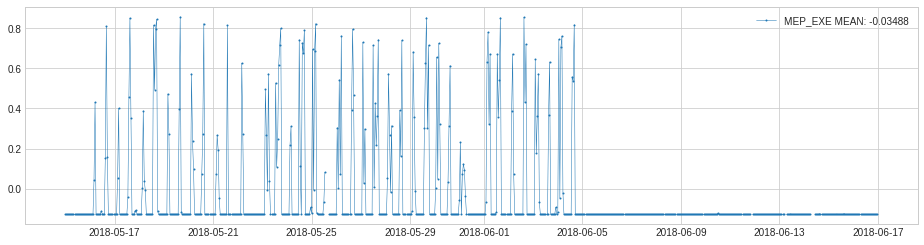

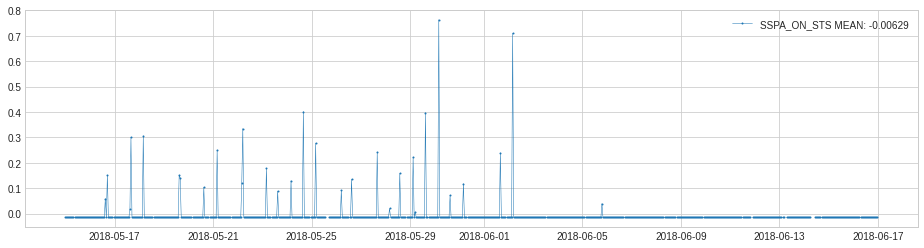

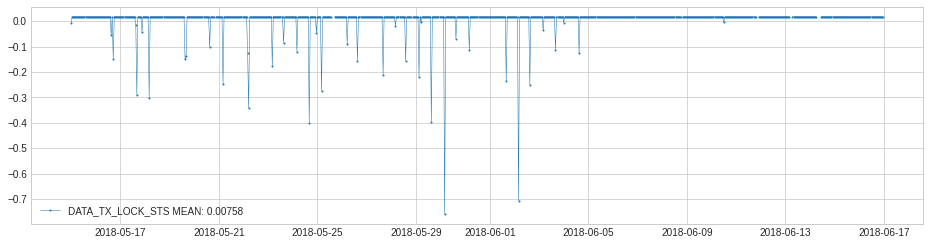

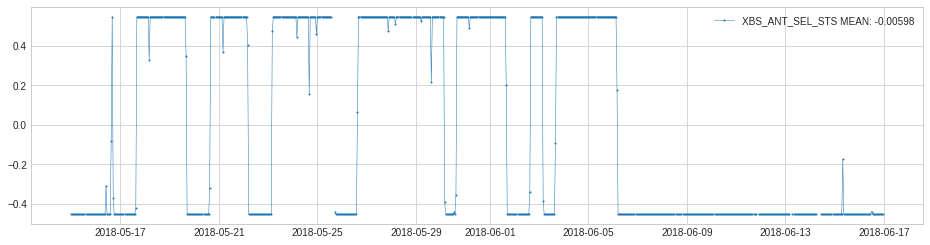

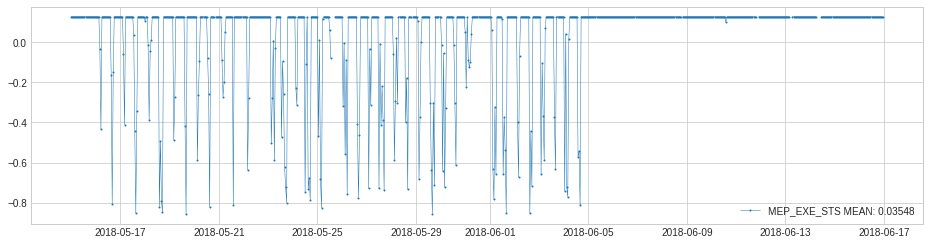

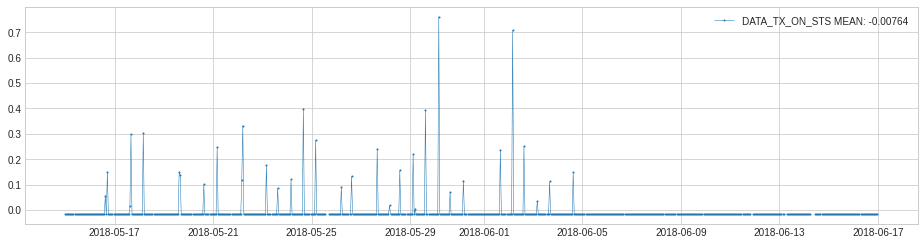

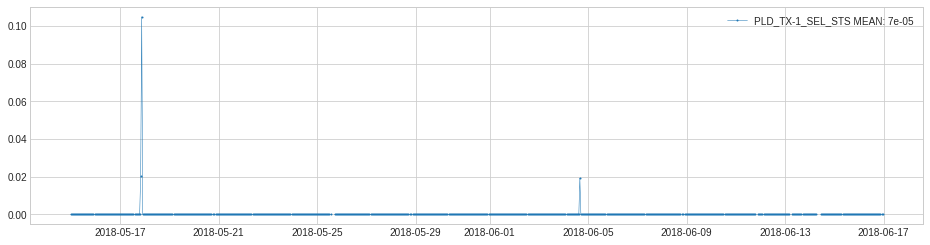

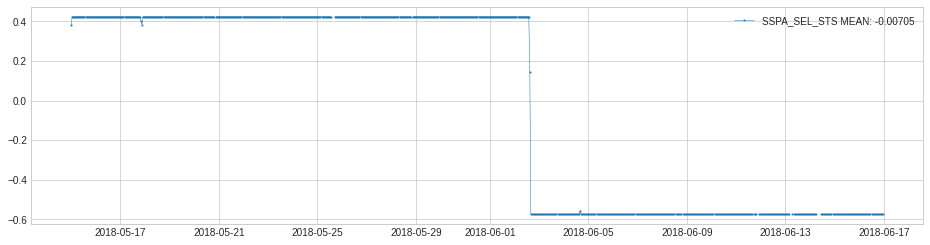

In [15]:
#Plotting the deviation dataframe
from adtk.visualization import plot
df_remsampled = deviation_df.resample('H').mean()
for column in df_remsampled: 
    new_column_name = column + ' MEAN: '+ str(round(df_remsampled[column].mean(), 5))
    df_remsampled = df_remsampled.rename({column: new_column_name}, axis=1)
    plot(df_remsampled[new_column_name],legend=True)


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

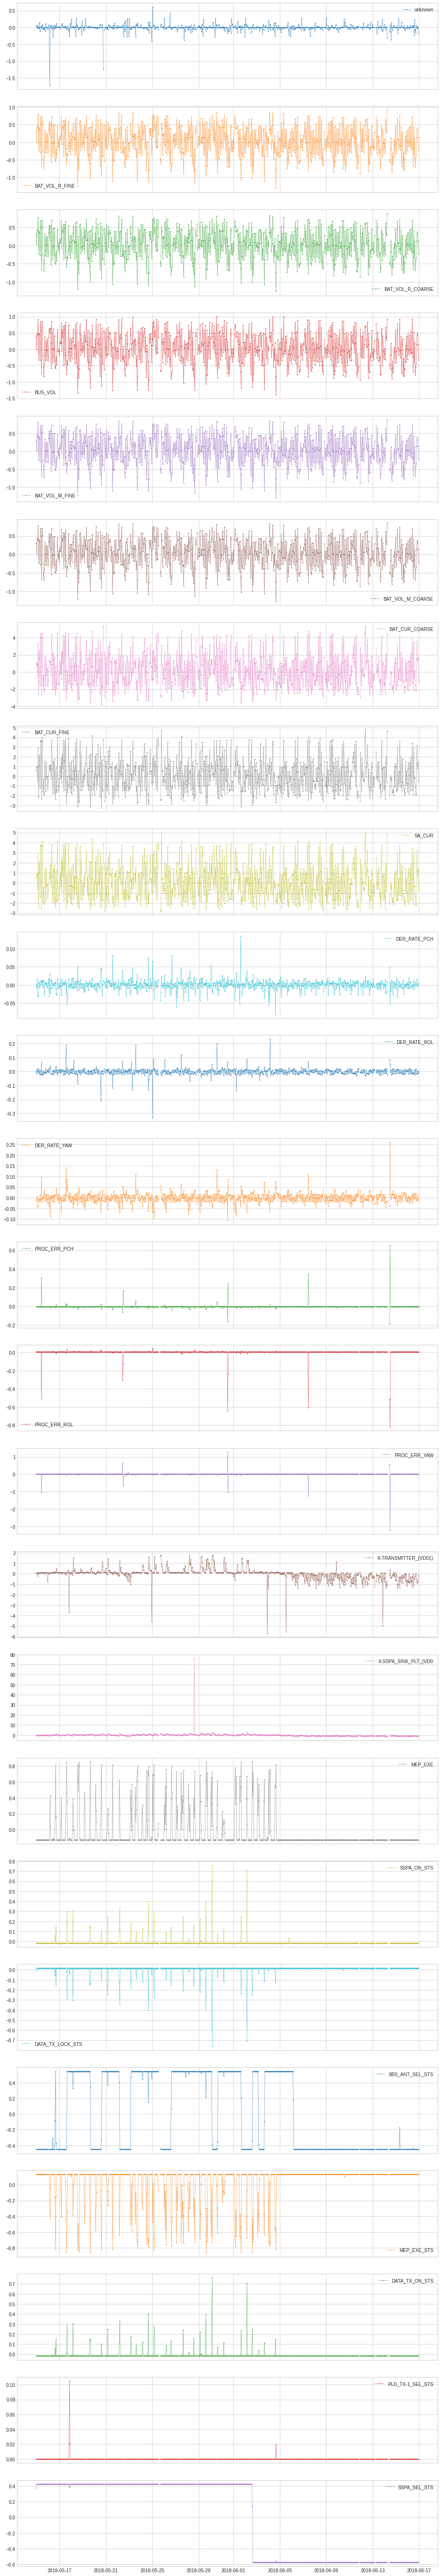

In [16]:
#Plotting the deviation dataframe
from adtk.visualization import plot
plot(deviation_df.resample('H').mean(),legend=True)


Anomalies detected at
DatetimeIndex(['2018-05-15 01:00:00', '2018-05-15 11:00:00',
               '2018-05-15 12:00:00', '2018-05-16 04:00:00',
               '2018-05-16 05:00:00', '2018-05-16 06:00:00',
               '2018-05-16 10:00:00', '2018-05-16 11:00:00',
               '2018-05-16 12:00:00', '2018-05-16 13:00:00',
               ...
               '2018-06-14 03:00:00', '2018-06-14 12:00:00',
               '2018-06-14 13:00:00', '2018-06-14 16:00:00',
               '2018-06-15 03:00:00', '2018-06-15 08:00:00',
               '2018-06-15 09:00:00', '2018-06-15 16:00:00',
               '2018-06-16 10:00:00', '2018-06-16 13:00:00'],
              dtype='datetime64[ns]', name='Date', length=247, freq=None)


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

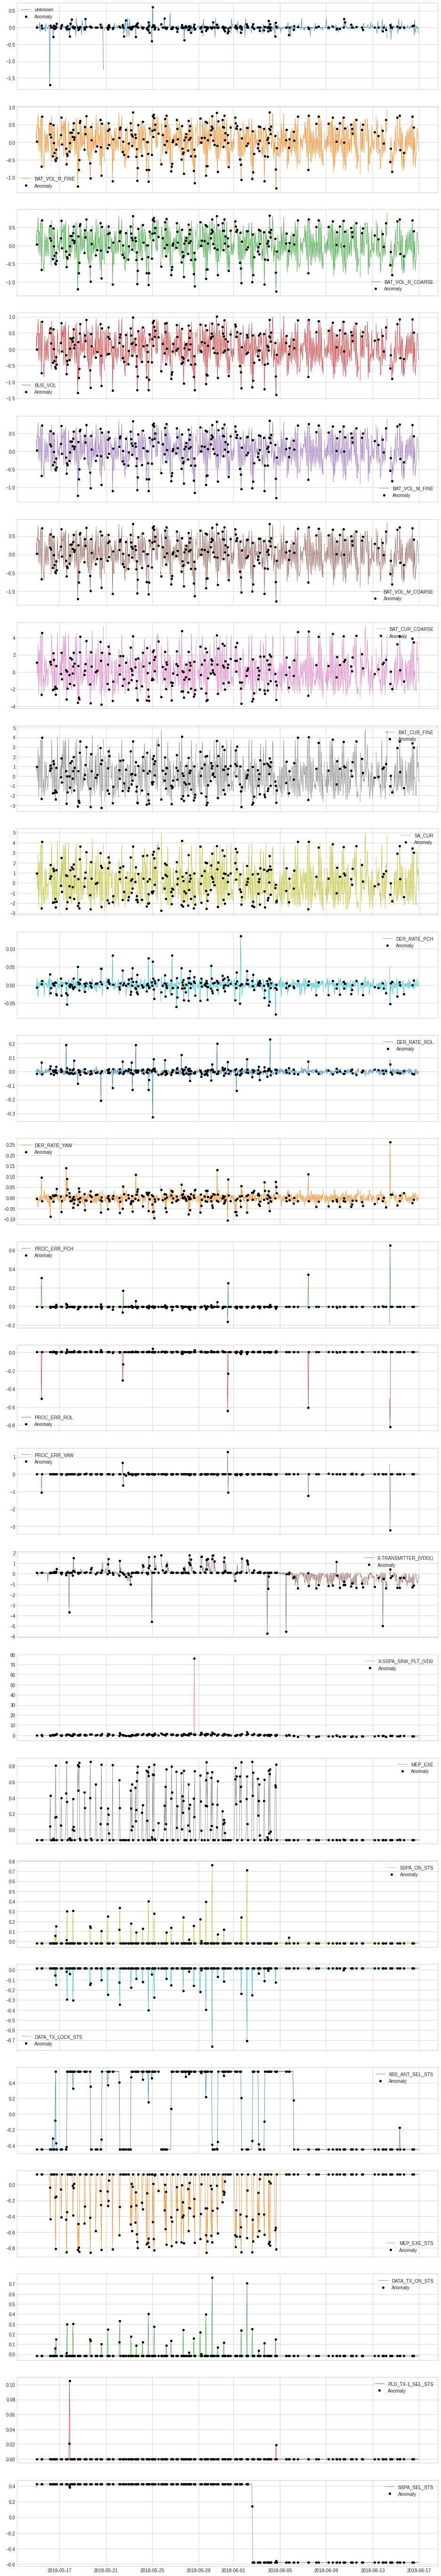

In [17]:
#Use resampling, autoregression from adtk and plot with anomalies
from adtk.detector import AutoregressionAD
from adtk.visualization import plot
from adtk.detector import CustomizedDetectorHD
df_resampled = deviation_df.resample('H').mean()

def myDetectionFunc1(df):
    ano = pd.Series()
    for column in deviation_df.columns[1:]:
        ar = AutoregressionAD(c=3.0).fit_detect(df[column]).fillna(0).replace(0.0, False).replace(1.0, True)
        ano = ano | ar
    return ano

customized_detector = CustomizedDetectorHD(detect_func=myDetectionFunc1)
anomalies1 = customized_detector.detect(df_resampled)
print('Anomalies detected at')
print(anomalies1[anomalies1].index)
plot(deviation_df.resample('H').mean(),legend=True, anomaly=anomalies1, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black')

